In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())

/Users/rinckd/__Code/__mathCreativity/notebooks


## Linear Regression 

The objective of linear regression is to minimize the cost function:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

Where the hypothesis $h_{\theta}(x)$ is given by:

$$h_{\theta}(x) = \theta^Tx = \Theta_0 + \Theta_{1}x_1 + \Theta_2x_2 + ... + \theta_nx_n$$

We could think of $\theta_0$ as the basic price of the house, $\theta_1$ as the price per square meter, $\theta_2$ as price per floor, etc.

### Normal Equation

Rather than using gradient descent to iteratively find $J(\theta) = 0$  we can analytically solve using the Normal Equation.

| x0 | Size(feet) | Bedrooms | Floors | Price |
|----|------------|----------|--------|-------|
| 1  | 2104       | 5        | 1      | 460   |
| 1  | 1416       | 3        | 2      | 232   |
| 1  | 1534       | 3        | 2      | 315   |

This becomes:
$X = \begin{bmatrix}1 & 2104 & 5 & 1\\1 & 1416 & 3 & 2\\1 & 1534 & 3 & 2 \end{bmatrix}$

$Y = \begin{bmatrix}460 \\ 232 \\ 315\end{bmatrix}$

$\theta = (X^TX)^{-1}X^T$

This will give you $\theta$ that minimizes your cost function.

We are trying to create a function $h_\theta(x)$ values for $\theta$ to get our output y
    



In [30]:
X = np.array([(1,2104,5,1), (1,1416,3,2), (1, 1534, 3, 2)])
print(X)
X2 = np.transpose(X)

X3 = np.dot(X, X2)
X3

[[   1 2104    5    1]
 [   1 1416    3    2]
 [   1 1534    3    2]]


array([[4426843, 2979282, 3227554],
       [2979282, 2005070, 2172158],
       [3227554, 2172158, 2353170]])

### Our Data:

ex1data1.txt - X is the population of a city and Y is the profit of a food truck in that city. A negative value for profit indicates a loss.

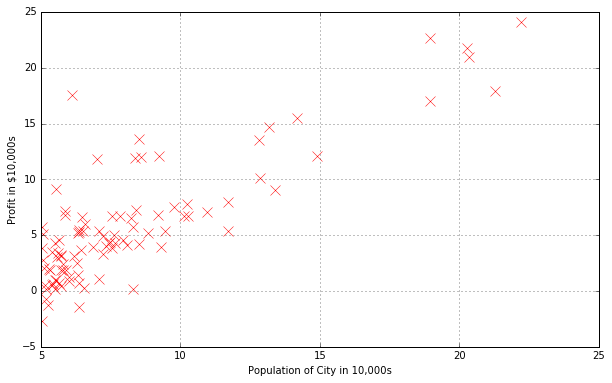

In [3]:
datafile = './data/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)

X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
plt.figure(figsize=(10,6))
plt.plot(X,y,'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

Each sample is a row in the X matrix. In order to take into account the intercept term $\theta_0$ we add an additional first column to X and set it to all 1s. See the table above with x0. This allows us to treat $\theta_0$ as simply another 'feature'



In [4]:
X = np.insert(X,0,1,axis=1)

### Normal Equation



In [15]:
theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)), np.transpose(X)), y)
print(theta)

[[-3.89578088]
 [ 1.19303364]]


### Gradient Descent

In [5]:
def computeCost(theta: object, X: object, y: object) -> object: #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    m = y.size # number of training examples
    h = np.dot(X, theta)
    S = np.sum((h - y)**2)
    return S / (2*m)

#Test that running computeCost with 0's as theta returns 32.07:
initial_theta = np.zeros((X.shape[1],1)) 
#note to self: *.shape is (rows, columns)

#(theta is a vector with n rows and 1 columns (if X has n features) )
print(computeCost(initial_theta,X,y))

32.0727338775


In [20]:
#Actual gradient descent minimizing routine
iterations = 1500
alpha = 0.01
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(tmptheta))
        m = y.size # number of training examples

        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

[[-3.63606348]
 [ 1.16698916]]


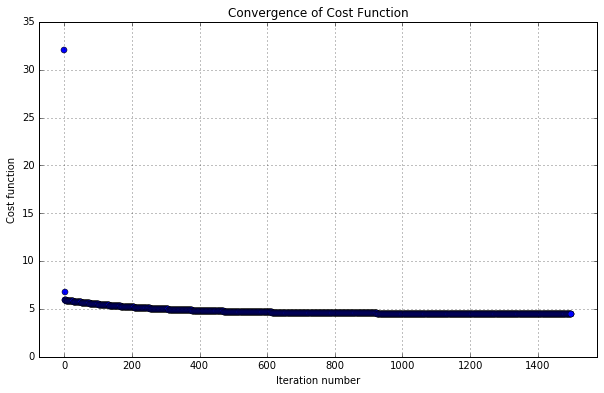

In [21]:
#Actually run gradient descent to get the best-fit theta values

initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
#dummy = plt.ylim([4,7])
print(theta)

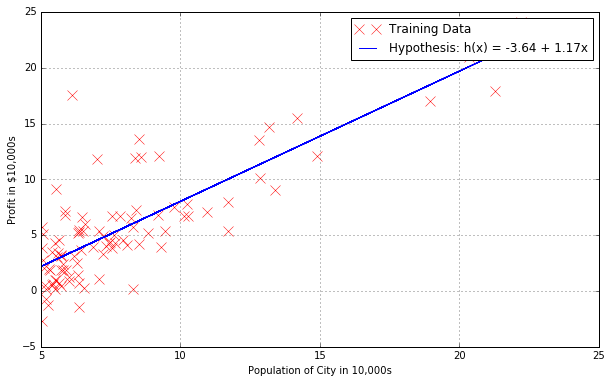

In [37]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return theta[0] + theta[1]*xval

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

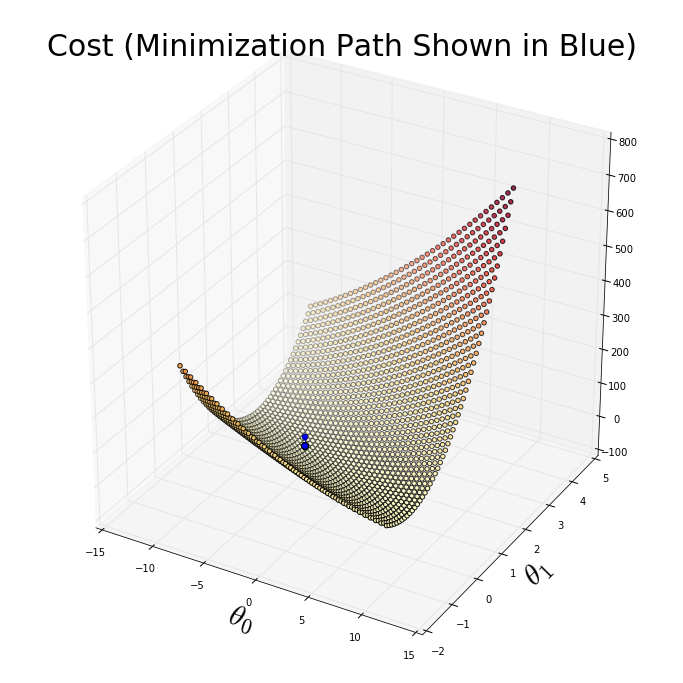

In [38]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()